### Introduction
Hello.

I am going to use Seaborn Library of Python for creating graphs about 
'Fatal Police Shooting' dataset. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [2]:
# Read tables
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
10.9     128
6.3      126
4.4      126
8.3      125
11.5     125
7.9      123
5.9      122
11.1     122
8.7      122
10.2     122
8.6      122
12.8     121
8.8      121
14.3     121
8.5      120
9.1      120
13.5     120
10.8     118
16       118
15.4     118
9.3      118
11.2     118
7.5      117
7.6      117
8        117
        ... 
89.6       1
92         1
56.5       1
58.5       1
64         1
56.3       1
83         1
57.2       1
70.5       1
73.9       1
83.3       1
69.1       1
93.5       1
68         1
83.1       1
58.6       1
69.7       1
73.3       1
66.3       1
76.3       1
92.7       1
55.5       1
73         1
62.2       1
69.3       1
83.9       1
76.7       1
87.8       1
73.8       1
77.4       1
Name: poverty_rate, Length: 771, dtype: int64

In [5]:
#list of states
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

### Bar Plot 

In [6]:
#Poverty Rate of Each State
percentage_people_below_poverty_level.poverty_rate.replace([0],np.nan,inplace = True)
percentage_people_below_poverty_level.poverty_rate.replace(['-'],np.nan,inplace = True)
percentage_people_below_poverty_level.dropna(inplace = True)
percentage_people_below_poverty_level.tail()
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

Text(0.5, 1.0, 'Area Poverty Ratio')

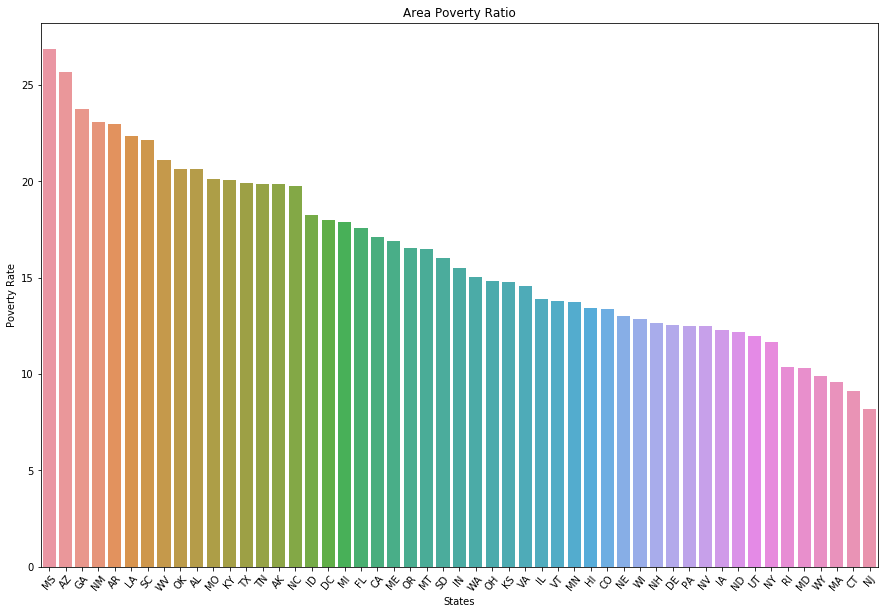

In [7]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area'] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x) #her state için ortalama poverty rate hesapladık
    area_poverty_ratio.append(area_poverty_rate)#her state i değerleriyle beraber ekledik.
new_data = pd.DataFrame({'area_list' : area_list , 'area_poverty_ratio' : area_poverty_ratio})
new_index = (new_data['area_poverty_ratio'].sort_values(ascending = False).index.values)
sorted_data = new_data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation=50)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Area Poverty Ratio')

What we did at up there ?
1. At first, I cleared data. Dropped ' - ' values from the table.
2. At second step, I needed to find mean value of poverty level of each state.
3. After this, I created a new dataframe with ' state names ' and ' mean values poverty levels of each state '.
4. I created an index from mean values.
5. At last, drawed bar plot using Seaborn library.

In [8]:
#another bar plot
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
kill.name.value_counts()

TK TK                         49
Michael Johnson                2
Eric Harris                    2
Michael Brown                  2
Brandon Jones                  2
TK Tk                          2
Daquan Antonio Westbrook       2
Randolph McClain               1
Blaine Robert Erb              1
Ismael Miranda                 1
Donald Allen                   1
Killian O'Quinn                1
Donald S. Myers                1
Dave Phoenix                   1
Andy Martinez                  1
Joshua Shane Bispo             1
Evan Cox                       1
Ivory C. Pantallion            1
Eric Robinson                  1
Jordan Gonzales                1
Eddie Tapia                    1
Scott N. Bloomfield            1
Randy Lee Cumberledge          1
Thomas Gezotis                 1
Andres Lara-Rodriguez          1
Ronald D. Williams             1
Martin Hurtado                 1
Shelly Haendiges               1
Kaylene Stone                  1
Cedric Norris                  1
          

I need to drop the ' TK TK ' values from the dataframe.

Text(0.5, 1.0, 'Most Common 15 Names Of Killed People')

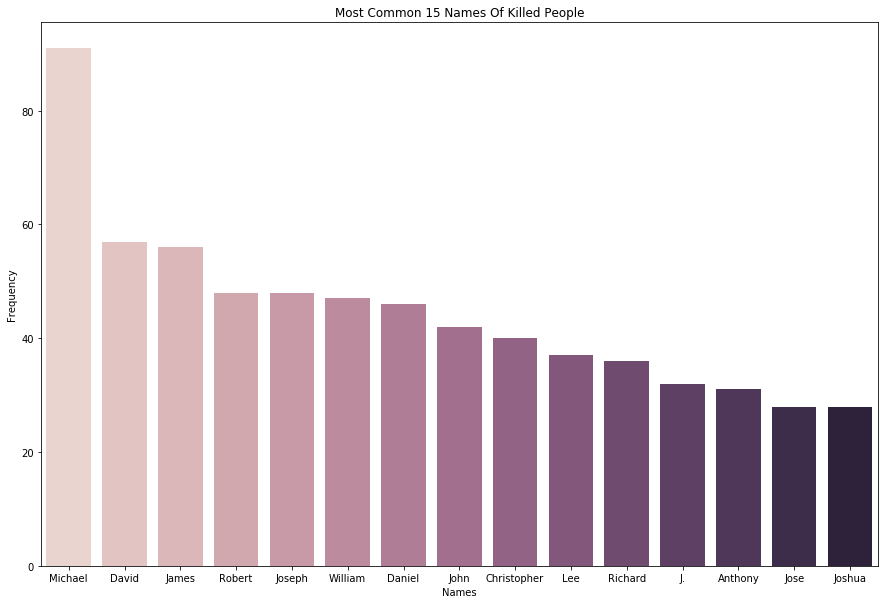

In [10]:
seperate = kill.name[kill.name != 'TK TK'].str.split()
a,b=zip(*seperate) #istenmeyen değerlerden ayrılmıs listeyi zip metoduyla isim = a, soyisim = b şeklinde ayırdık. 
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

#Visualization

plt.figure(figsize=(15,10))
ax = sns.barplot(x=x , y=y, palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.title('Most Common 15 Names Of Killed People')

What I did up there ? 
1. I dropped useless valus from main dataframe, crated a new dataframe name is ' seperate '.
2. I focused on both of ' name ' and ' surname ' attributes. 
3. So, I unzipped the ' seperate ' dataframe.
4. There are two variable. I saved names and surnames with them.
5. I combined these variables. The new list is my new names and surnames's list.
6. I counted each name and surname. And I found the most common ones.
7. At last, in the 'x' variable, I saved the most common name list, in the 'y' variable I saved count value.


In [11]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
91.9     158
92.7     158
92.2     157
93.4     156
90.9     156
89.7     153
93.9     150
89.4     150
91.1     150
90.2     149
91.6     148
91.5     147
88.1     146
92.6     146
93.6     146
90.4     145
89.1     145
94.3     144
89.9     142
89.5     142
        ... 
25.9       1
22.5       1
29.1       1
20         1
30.7       1
16.6       1
6.3        1
50.2       1
32.5       1
24.1       1
38.8       1
36.5       1
26.7       1
37.4       1
20.8       1
42.7       1
52         1
26.6       1
11.1       1
38.6       1
31.8       1
43.9       1
17.1       1
47.2       1
25.5       1
52.3       1
18.2       1
16.4       1
46.1       1
13.2       1
Name: percent_completed_hs, Length: 728, dtype: int64

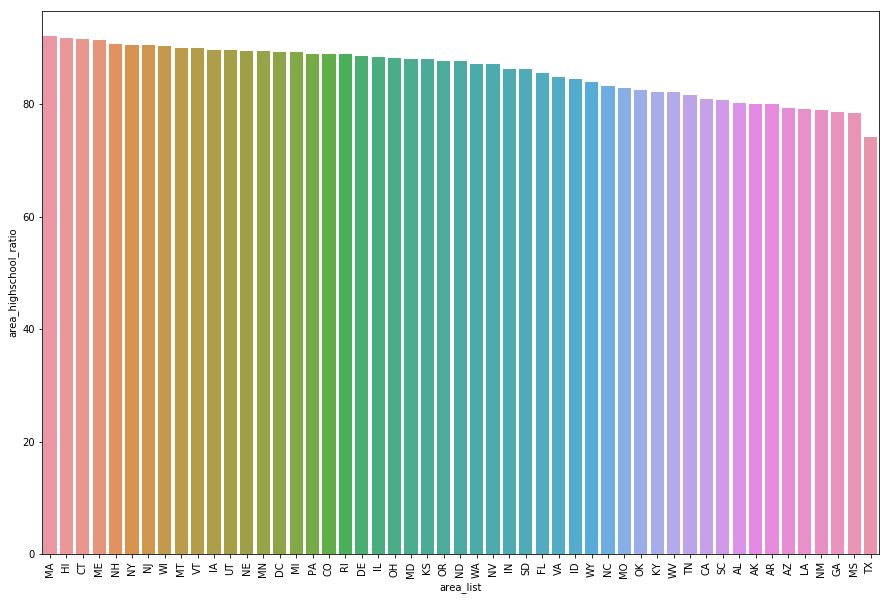

In [13]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0, inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
data = pd.DataFrame({'area_list' : area_list , 'area_highschool_ratio' : area_highschool})
index_new = (data['area_highschool_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data.reindex(index_new)

#visualization

plt.figure(figsize = (15,10))
ax = sns.barplot(x = sorted_data2['area_list'], y = sorted_data2['area_highschool_ratio'])
plt.xticks(rotation = 90)
plt.xlabel = 'States'
plt.ylabel = 'High School Graduate Rating'
plt.title = "Percentage of Given State's Population Above 25 that Has Graduated High School"

In [14]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Races percent'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

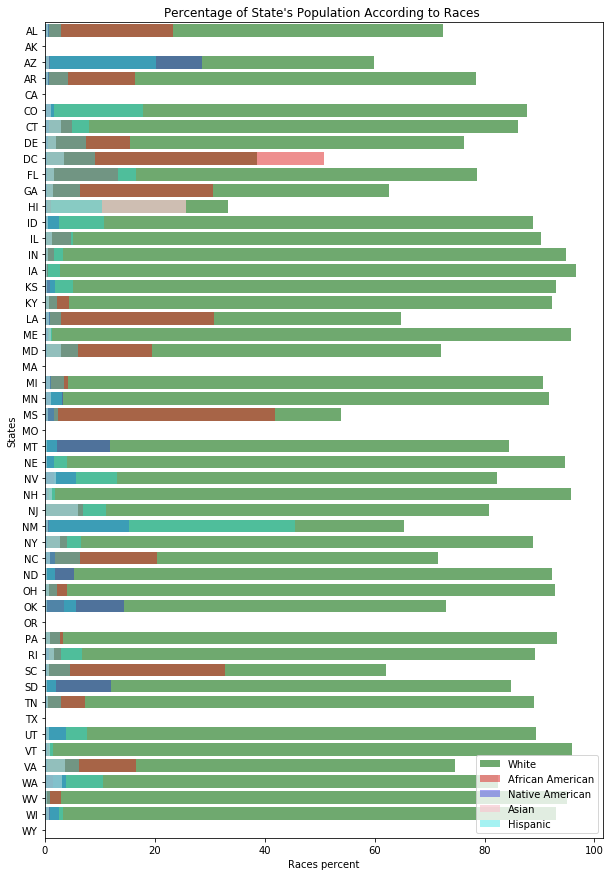

In [15]:
share_race_city.replace(['-'],np.NaN, inplace = True)
share_race_city.replace(['(X)'], np.NaN, inplace = True)
share_race_city.dropna()
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area'] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
    
#Visualization

f, ax = plt.subplots(figsize = (10,15))
sns.barplot(x = share_white , y = area_list , color = 'green', alpha = 0.6, label = 'White')
sns.barplot(x = share_black , y = area_list , color = 'red', alpha = 0.5, label = 'African American')
sns.barplot(x = share_native_american, y = area_list, color = 'blue', alpha = 0.4, label = 'Native American')
sns.barplot(x = share_asian, y = area_list, color = 'pink',alpha = 0.7 , label = 'Asian' )
sns.barplot(x = share_hispanic, y = area_list, color = 'cyan', alpha = 0.4, label = 'Hispanic')

ax.legend(loc = 'lower right', frameon = True)
ax.set(xlabel = 'Races percent', ylabel = 'States', title = "Percentage of State's Population According to Races ")

### Horizontal Bar Plot with Subplots
What did I do at up there 
1. I dropped out '-' and (x) values. 
2. Calculated percentage values for each race.
3. Drew graph.

### Point Plot

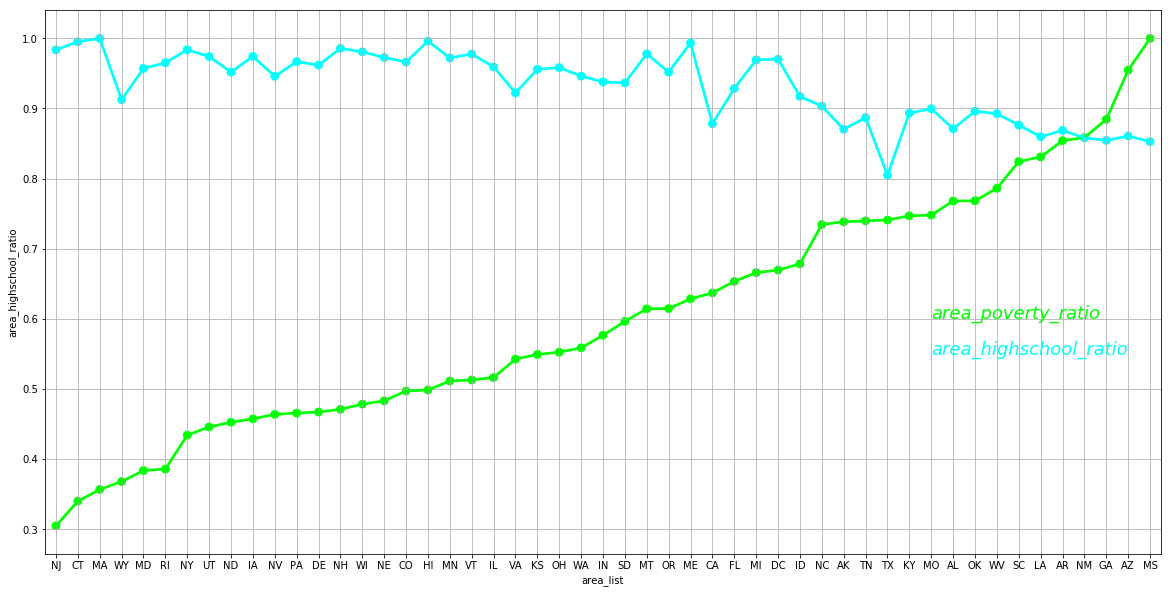

In [16]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis = 1)
data.sort_values('area_poverty_ratio', inplace = True)

#Visualization

f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio', data=data, color = 'lime', alpha=0.5)
sns.pointplot(x='area_list',y='area_highschool_ratio', data=data, color = 'cyan', alpha=0.5)
plt.text(40,0.6,'area_poverty_ratio', color = 'lime', style = 'italic', fontsize = 18 )
plt.text(40,0.55, 'area_highschool_ratio', color = 'cyan', style = 'italic', fontsize = 18)
plt.grid()

#### What did I do up here ?
* Made a simply normalization to dataframes which I will use.
* I made it because of I needed to show two different dataframes. And dataframes had 
 different value scales.
* Drew graph.

In [17]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.304676,0.983615
6,CT,0.339883,0.995254
21,MA,0.356540,1.000000
50,WY,0.367788,0.912479
20,MD,0.383578,0.957107


### Joint Plot


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


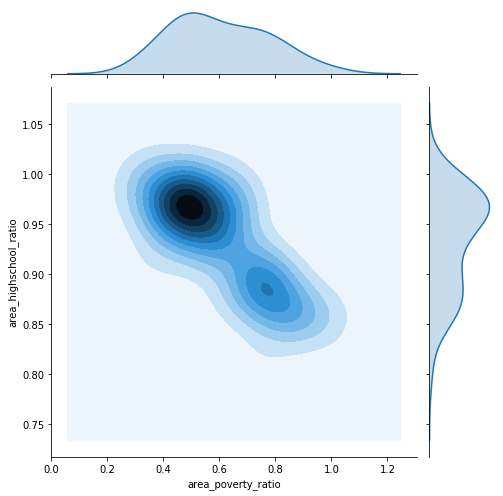

In [18]:
ax = sns.jointplot(x='area_poverty_ratio', y='area_highschool_ratio', data = data, kind='kde', size=7)
plt.savefig('graph.png')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


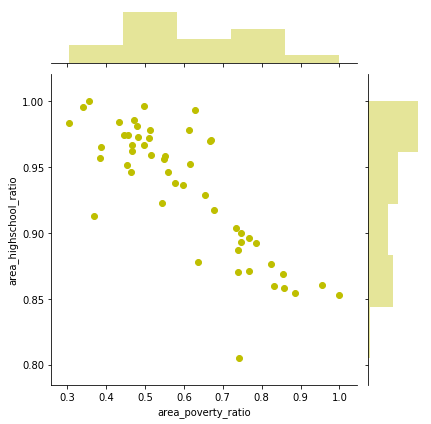

In [19]:
g = sns.jointplot(x='area_poverty_ratio', y='area_highschool_ratio', data = data, ratio=5, color = 'y')
plt.show()

### Pie Chart

([<matplotlib.patches.Wedge at 0x7fb5bb679748>,
 [Text(-0.04576805894059242, 1.099047444281097, 'W'),
  Text(-0.7948471064967465, -1.0286972719385183, 'B'),
  Text(0.7415144891274078, -0.8125000076394582, 'H'),
  Text(1.0756543479110436, -0.23014717860549105, 'A'),
  Text(1.092504937547686, -0.1281911129288105, 'N'),
  Text(1.0992228674241646, -0.04134111430280109, 'O')],
 [Text(-0.02496439578577768, 0.5994804241533255, '51.3%'),
  Text(-0.48913668092107465, -0.6330444750390882, '26.4%'),
  Text(0.4044624486149497, -0.44318182234879533, '18.1%'),
  Text(0.5867205534060237, -0.1255348246939042, '1.7%'),
  Text(0.5959117841169196, -0.06992242523389662, '1.3%'),
  Text(0.5995761095040898, -0.022549698710618776, '1.2%')])

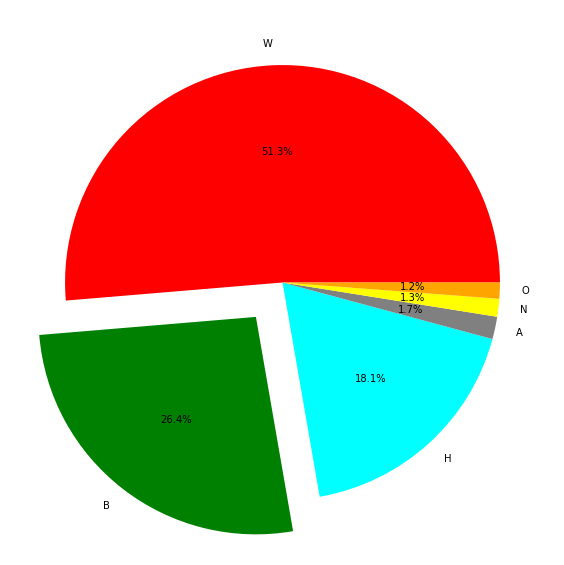

In [20]:
kill.race.dropna(inplace=True)
labels = kill.race.value_counts().index
colors = ['red','green','cyan','grey','yellow','orange']
explode = [0,0.2,0,0,0,0]
sizes = kill.race.value_counts().values

#visualization

plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels = labels, colors = colors, autopct = '%1.1f%%')

What did I do up there ?
1. I created a list with races of people had killed.
2. I created another list with indexes of races.
3. I created a figure with labels, size, explode parameters.
4. Explode parameter means, how far between of each piece of pie.

Pie chart calculates percentage of value to all value automatically.

### LM Plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


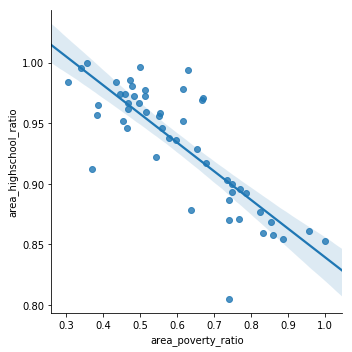

In [21]:
data.head()
sns.lmplot(x='area_poverty_ratio',y='area_highschool_ratio', data = data)
plt.show()

### KDE Plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


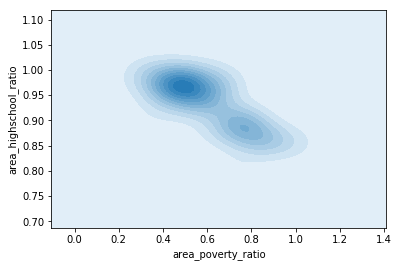

In [22]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio, shade = True, cut = 5)
#cut parameter means, increase of scale at the axis. 
plt.show()

### Violin Plot

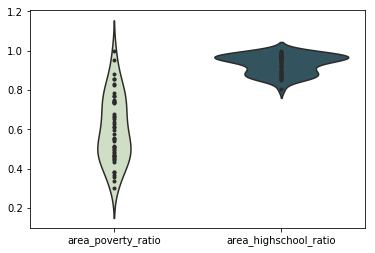

In [23]:
pal = sns.cubehelix_palette(2,rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner='points')
plt.show()

Violin Plot;
* gives us to frequency of data samples.
* works with numeric datas.

### Heat Map

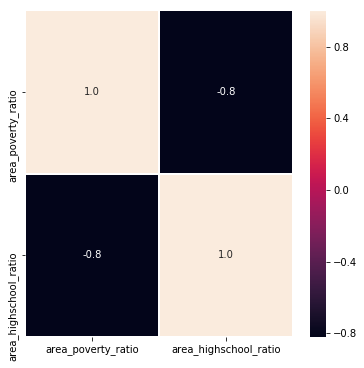

In [24]:
f,ax = plt.subplots(figsize = (6,6))
sns.heatmap(data.corr(), annot=True, linewidths = .5, fmt = '.1f', ax=ax)
#ax = ax means, fill the figure with heatmap.
plt.show()

### Box Plot

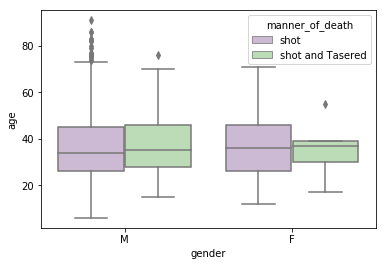

In [25]:
sns.boxplot(x='gender', y='age', hue='manner_of_death', data=kill, palette = 'PRGn')
plt.show()

### Swarm Plot

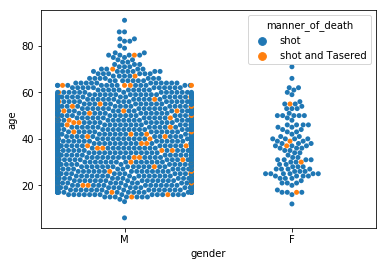

In [26]:
sns.swarmplot(x='gender', y='age', hue='manner_of_death', data = kill)
plt.show()

### Pair Plot

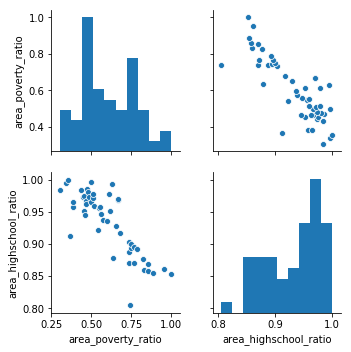

In [27]:
sns.pairplot(data)
plt.show()

### Count Plot

In [28]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

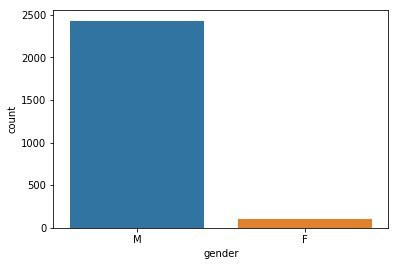

In [29]:
sns.countplot(kill.gender)
plt.show()

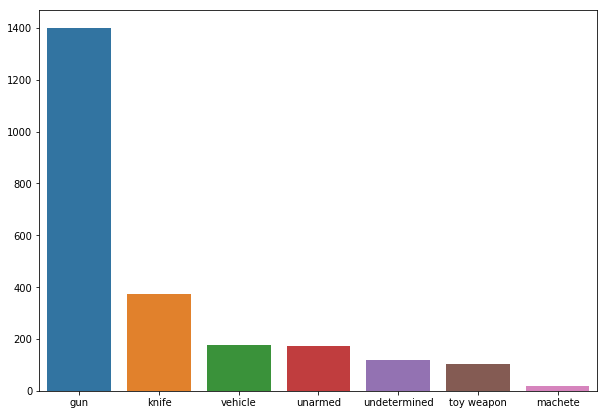

In [30]:
armed = kill.armed.value_counts()
plt.figure(figsize = (10,7))
sns.barplot(x = armed[:7].index, y = armed[:7].values)
plt.show()

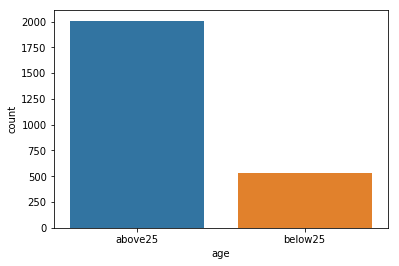

In [31]:
above25 = ['above25' if i>= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)

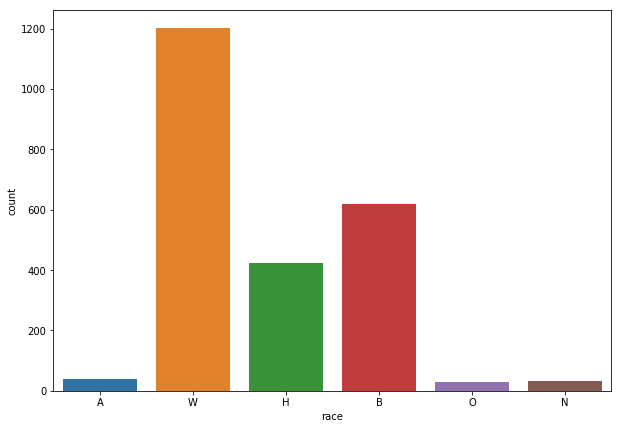

In [32]:
plt.figure(figsize = (10,7))
sns.countplot(data = kill, x='race')
plt.show()

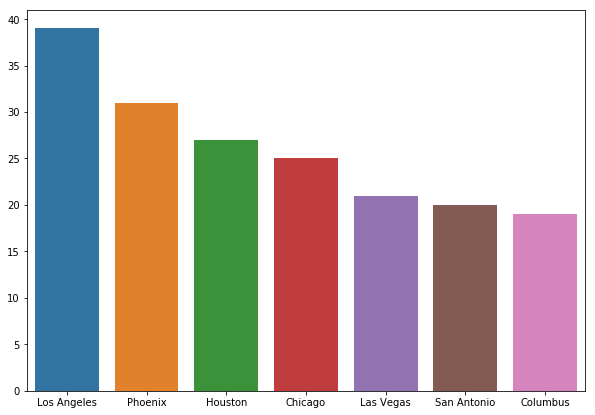

In [33]:
cities = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = cities[:7].index, y = cities[:7].values)
plt.show()

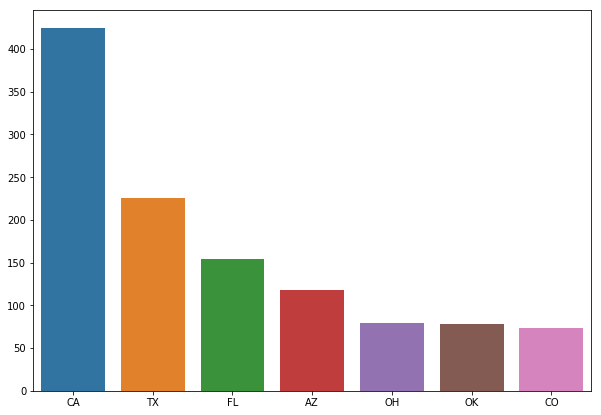

In [34]:
states = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x = states[:7].index, y = states[:7].values)
plt.show()

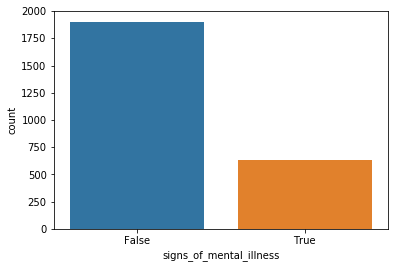

In [35]:
sns.countplot(kill.signs_of_mental_illness)
plt.show()

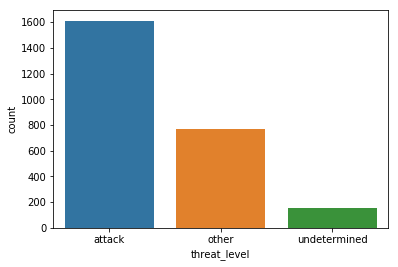

In [36]:
sns.countplot(kill.threat_level)
plt.show()

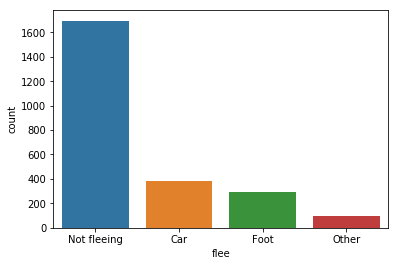

In [37]:
sns.countplot(kill.flee)
plt.show()

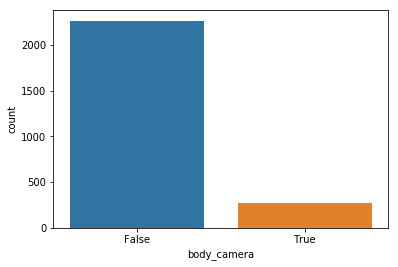

In [38]:
sns.countplot(kill.body_camera)
plt.show()

### Conclusion

I am waiting your comments and ratings. Thank you !